In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Step 1: Categories list
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Step 2: Create random data dictionary
n = 500
data = {
    'Date': pd.date_range(start='2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

In [3]:
# Load into DataFrame
df = pd.DataFrame(data)

# Explore the data
print("\n Data Preview:")
print(df.head())

print("\n Data Info:")
print(df.info())

print("\n Description:")
print(df.describe())

print("\n Category Counts:")
print(df['Category'].value_counts())


 Data Preview:
        Date Category  Likes
0 2021-01-01   Health   1644
1 2021-01-02     Food   6930
2 2021-01-03   Travel   8793
3 2021-01-04    Music   7830
4 2021-01-05    Music    646

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None

 Description:
                      Date        Likes
count                  500   500.000000
mean   2021-09-07 12:00:00  5198.902000
min    2021-01-01 00:00:00    13.000000
25%    2021-05-05 18:00:00  2655.000000
50%    2021-09-07 12:00:00  5406.500000
75%    2022-01-10 06:00:00  7713.750000
max    2022-05-15 00:00:00  9976.000000
std                    NaN  2905.283205

 Category Co

In [4]:
def descriptive_summary(df):
    print("Descriptive Stats")
    print(df.describe())
    print("\n Category Distribution")
    print(df['Category'].value_counts())
    print("\n Average Likes per Category")
    print(df.groupby('Category')['Likes'].mean().sort_values(ascending=False))

descriptive_summary(df)

Descriptive Stats
                      Date        Likes
count                  500   500.000000
mean   2021-09-07 12:00:00  5198.902000
min    2021-01-01 00:00:00    13.000000
25%    2021-05-05 18:00:00  2655.000000
50%    2021-09-07 12:00:00  5406.500000
75%    2022-01-10 06:00:00  7713.750000
max    2022-05-15 00:00:00  9976.000000
std                    NaN  2905.283205

 Category Distribution
Category
Fitness    70
Music      68
Family     64
Health     62
Food       60
Culture    60
Fashion    59
Travel     57
Name: count, dtype: int64

 Average Likes per Category
Category
Health     5796.967742
Fashion    5675.881356
Travel     5522.192982
Music      5191.000000
Food       5183.666667
Culture    4897.516667
Fitness    4779.142857
Family     4656.218750
Name: Likes, dtype: float64


In [5]:
# Drop nulls (just in case)
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert 'Date' to DateTime (to make sure it's in the right format)
df['Date'] = pd.to_datetime(df['Date'])

# Ensure 'Likes' is integer
df['Likes'] = df['Likes'].astype(int)

print("Data cleaned successfully!")

Data cleaned successfully!


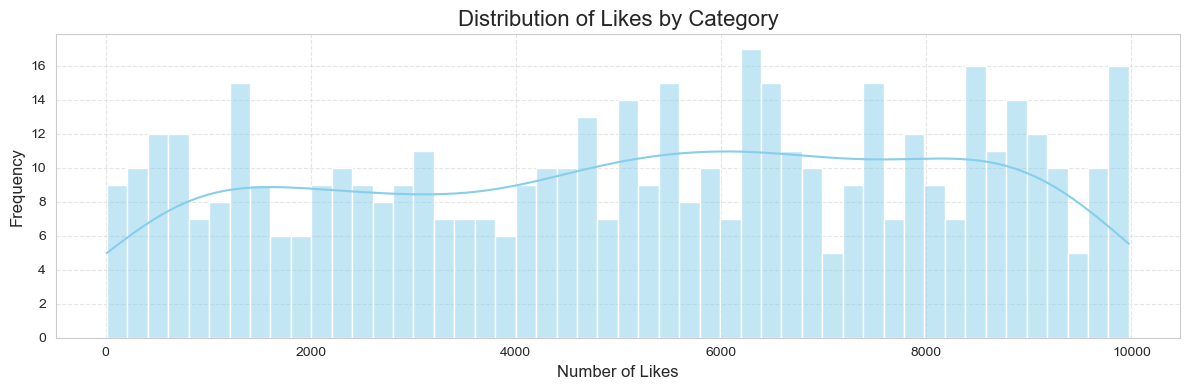

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(12, 4))

sns.histplot(
    data=df,
    x='Likes',
    bins=50,
    color='skyblue',
    linewidth=1, kde=True  
)

# Titles and labels
plt.title('Distribution of Likes by Category', fontsize=16)
plt.xlabel('Number of Likes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.savefig("likes_histogram.png")

/var/folders/s5/xbw4ql0j5vn4nbf5dj2r1cs00000gn/T/ipykernel_7864/2536647612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


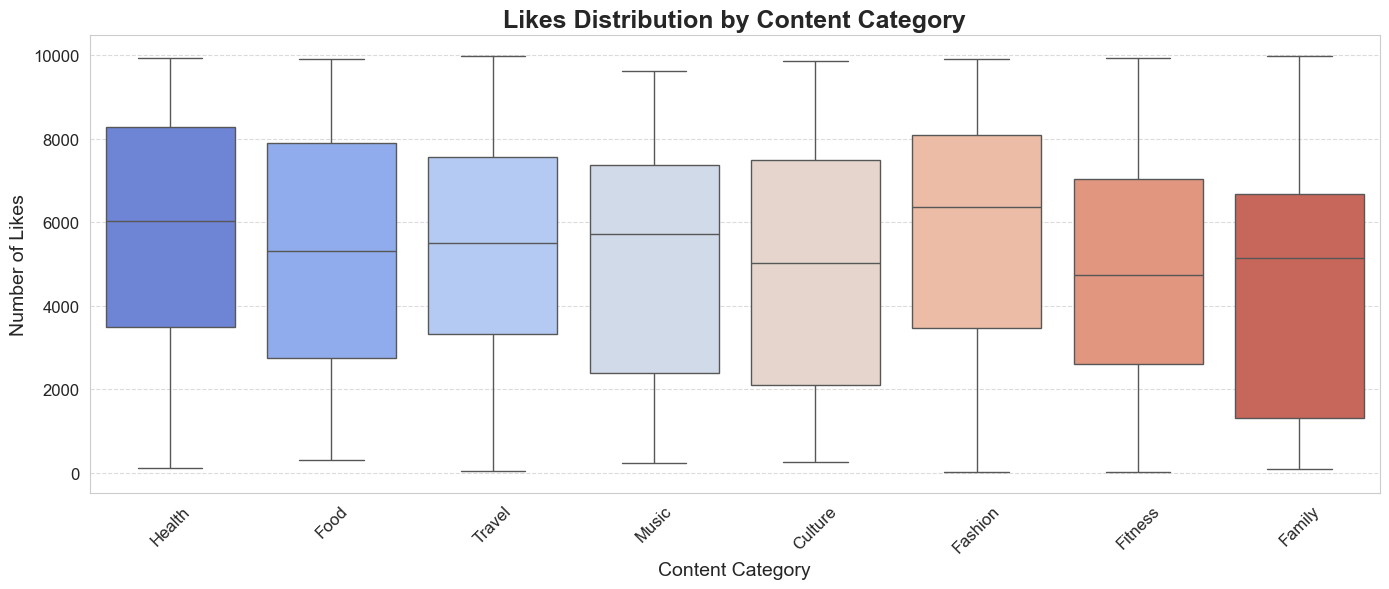

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(14, 6))  # Wider and taller

# Optional: Seaborn style
sns.set_style("whitegrid")

# Fancy boxplot
sns.boxplot(
    x='Category',
    y='Likes',
    data=df,
    palette='coolwarm'
)

# Title & labels
plt.title('Likes Distribution by Content Category', fontsize=18, fontweight='bold')
plt.xlabel('Content Category', fontsize=14)
plt.ylabel('Number of Likes', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

plt.savefig("category_boxplot.png")

In [8]:
print("\n Average Likes:", df['Likes'].mean())

print("\n Average Likes by Category:")
print(df.groupby('Category')['Likes'].mean())


 Average Likes: 5198.902

 Average Likes by Category:
Category
Culture    4897.516667
Family     4656.218750
Fashion    5675.881356
Fitness    4779.142857
Food       5183.666667
Health     5796.967742
Music      5191.000000
Travel     5522.192982
Name: Likes, dtype: float64


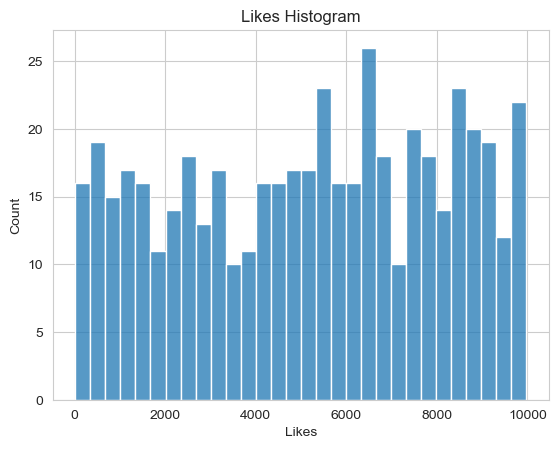

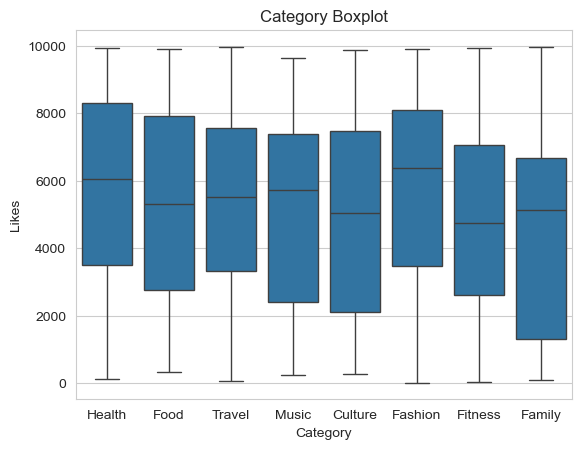

In [18]:
plt.figure()
sns.histplot(df['Likes'], bins=30)
plt.title('Likes Histogram')
plt.savefig("likes_histogram.png")  # Saves the chart

plt.figure()
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Category Boxplot')
plt.savefig("category_boxplot.png")